# Linear Regression on House Prices (1D) with Keras

All Rights Reserved © <a href="http://www.louisdorard.com">Louis Dorard</a>

<img src="http://s3.louisdorard.com.s3.amazonaws.com/DL_icon.png">

In this notebook we show how to perform linear regression on house prices data, using Keras.

## Define `X_train` and `y_train`

Run [House Prices 1D](House-Prices-1D.ipynb) notebook to create `data`

In [1279]:
#%run House-Prices-1D.ipynb

In [1280]:
%matplotlib inline
import pandas
from pandas import read_csv
data = read_csv('../04-house-prices/origin-trainfull.csv', index_col=0)
test = read_csv('../04-house-prices/origin-test.csv', index_col=0)

In [1281]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


Output is `SalePrice`

In [1282]:
Y_train = data.SalePrice

In [1283]:
Y_train.shape

(1460,)

In [1284]:
from numpy import transpose
Y_train = transpose([Y_train])

In [1285]:
Y_train.shape

(1460, 1)

In [1286]:
X_train = data.drop('SalePrice', axis=1)
train_and_test = X_train.append(test)

In [1287]:
train_and_test = train_and_test.fillna(0)

In [1288]:
del train_and_test['MSSubClass']
train_and_test = train_and_test.select_dtypes(exclude=['object'])

In [1289]:
train_and_test = train_and_test.dropna(axis=1)

In [1290]:
train_and_test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,...,0.0,0,0,0,0,0,0,0,6,2006
2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,...,286.0,0,24,0,0,0,0,0,4,2006
2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [1291]:
train_and_test.shape

(2919, 35)

In [1292]:
X_train = train_and_test[:1460].astype(float)
X_train

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0
2,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0
3,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0
4,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0
5,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,953.0,...,460.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0
1457,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,589.0,...,500.0,349.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2010.0
1458,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,877.0,...,252.0,0.0,60.0,0.0,0.0,0.0,0.0,2500.0,5.0,2010.0


In [1293]:
test = train_and_test[1460:].astype(float)
test

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1461,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,...,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1462,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,...,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
1463,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,...,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
1464,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,...,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
1465,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,...,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,546.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0
2916,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,294.0,...,286.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0
2917,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,...,576.0,474.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0


In [1294]:
import matplotlib.pyplot as plt
%matplotlib notebook

In [1295]:
Y_train.shape

(1460, 1)

In [1296]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler
import numpy

numpy.random.seed(51)
model = Sequential()

features_number = X_train.shape[1]
model = Sequential([
    Input(features_number),
    Dense(features_number*10, activation='relu'),
    Dense(round(features_number*5), activation='relu'),
    Dense(round(features_number), activation='relu'),
    Dense(round(features_number/2), activation='relu'),
    Dense(1)
])

loss = 'mse'

LEARNING_RATE = 0.01
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
test = scaler.transform(test)

yscaler = StandardScaler()
Y_train_scaled = yscaler.fit_transform(Y_train)

BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 500 # how many iterations over the whole dataset
history = model.fit(X_train, Y_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

Train on 1460 samples
Epoch 1/500
1460/1460 [==============================] - 0s 307us/sample - loss: 1.0053
Epoch 2/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.9755
Epoch 3/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.9496
Epoch 4/500
1460/1460 [==============================] - 0s 23us/sample - loss: 0.9256
Epoch 5/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.9034
Epoch 6/500
1460/1460 [==============================] - 0s 17us/sample - loss: 0.8825
Epoch 7/500
1460/1460 [==============================] - 0s 20us/sample - loss: 0.8616
Epoch 8/500
1460/1460 [==============================] - 0s 23us/sample - loss: 0.8405
Epoch 9/500
1460/1460 [==============================] - 0s 23us/sample - loss: 0.8189
Epoch 10/500
1460/1460 [==============================] - 0s 27us/sample - loss: 0.7966
Epoch 11/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.7728
Epoch 12/500
1460/

Epoch 94/500
1460/1460 [==============================] - 0s 11us/sample - loss: 0.1705
Epoch 95/500
1460/1460 [==============================] - 0s 10us/sample - loss: 0.1697
Epoch 96/500
1460/1460 [==============================] - 0s 11us/sample - loss: 0.1690
Epoch 97/500
1460/1460 [==============================] - 0s 10us/sample - loss: 0.1683
Epoch 98/500
1460/1460 [==============================] - 0s 11us/sample - loss: 0.1676
Epoch 99/500
1460/1460 [==============================] - 0s 14us/sample - loss: 0.1670
Epoch 100/500
1460/1460 [==============================] - 0s 11us/sample - loss: 0.1663
Epoch 101/500
1460/1460 [==============================] - 0s 10us/sample - loss: 0.1656
Epoch 102/500
1460/1460 [==============================] - 0s 9us/sample - loss: 0.1649
Epoch 103/500
1460/1460 [==============================] - 0s 11us/sample - loss: 0.1643
Epoch 104/500
1460/1460 [==============================] - 0s 10us/sample - loss: 0.1636
Epoch 105/500
1460/1460 [===

1460/1460 [==============================] - 0s 12us/sample - loss: 0.1276
Epoch 187/500
1460/1460 [==============================] - 0s 12us/sample - loss: 0.1273
Epoch 188/500
1460/1460 [==============================] - 0s 12us/sample - loss: 0.1269
Epoch 189/500
1460/1460 [==============================] - 0s 12us/sample - loss: 0.1266
Epoch 190/500
1460/1460 [==============================] - 0s 16us/sample - loss: 0.1263
Epoch 191/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.1260
Epoch 192/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.1257
Epoch 193/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.1254
Epoch 194/500
1460/1460 [==============================] - 0s 16us/sample - loss: 0.1251
Epoch 195/500
1460/1460 [==============================] - 0s 20us/sample - loss: 0.1248
Epoch 196/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.1245
Epoch 197/500
1460/1460 [==========

Epoch 279/500
1460/1460 [==============================] - 0s 22us/sample - loss: 0.1049
Epoch 280/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.1047
Epoch 281/500
1460/1460 [==============================] - 0s 20us/sample - loss: 0.1045
Epoch 282/500
1460/1460 [==============================] - 0s 22us/sample - loss: 0.1043
Epoch 283/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.1042
Epoch 284/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.1040
Epoch 285/500
1460/1460 [==============================] - 0s 23us/sample - loss: 0.1038
Epoch 286/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.1036
Epoch 287/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.1034
Epoch 288/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.1032
Epoch 289/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.1030
Epoch 290/500
1460/14

1460/1460 [==============================] - 0s 23us/sample - loss: 0.0894
Epoch 372/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.0892
Epoch 373/500
1460/1460 [==============================] - 0s 17us/sample - loss: 0.0890
Epoch 374/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.0889
Epoch 375/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.0887
Epoch 376/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.0886
Epoch 377/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.0885
Epoch 378/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.0883
Epoch 379/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.0882
Epoch 380/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.0880
Epoch 381/500
1460/1460 [==============================] - 0s 20us/sample - loss: 0.0879
Epoch 382/500
1460/1460 [==========

Epoch 464/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.0774
Epoch 465/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.0773
Epoch 466/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.0772
Epoch 467/500
1460/1460 [==============================] - 0s 17us/sample - loss: 0.0771
Epoch 468/500
1460/1460 [==============================] - 0s 18us/sample - loss: 0.0770
Epoch 469/500
1460/1460 [==============================] - 0s 21us/sample - loss: 0.0769
Epoch 470/500
1460/1460 [==============================] - 0s 19us/sample - loss: 0.0768
Epoch 471/500
1460/1460 [==============================] - 0s 13us/sample - loss: 0.0767
Epoch 472/500
1460/1460 [==============================] - 0s 13us/sample - loss: 0.0766
Epoch 473/500
1460/1460 [==============================] - 0s 11us/sample - loss: 0.0764
Epoch 474/500
1460/1460 [==============================] - 0s 9us/sample - loss: 0.0763
Epoch 475/500
1460/146

In [1297]:
model.summary()

Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_174 (Dense)            (None, 350)               12600     
_________________________________________________________________
dense_175 (Dense)            (None, 175)               61425     
_________________________________________________________________
dense_176 (Dense)            (None, 35)                6160      
_________________________________________________________________
dense_177 (Dense)            (None, 18)                648       
_________________________________________________________________
dense_178 (Dense)            (None, 1)                 19        
Total params: 80,852
Trainable params: 80,852
Non-trainable params: 0
_________________________________________________________________


## Review learning curve

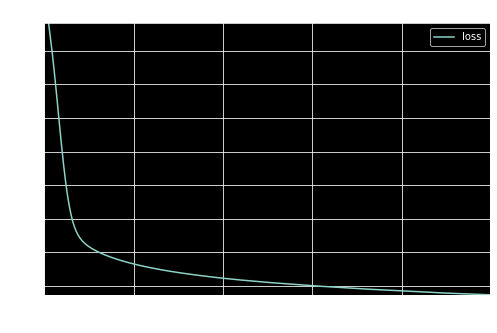

In [1298]:
import pandas as pd
%matplotlib inline
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.ylim(bottom = history.history['loss'][-1], top = history.history['loss'][5]);

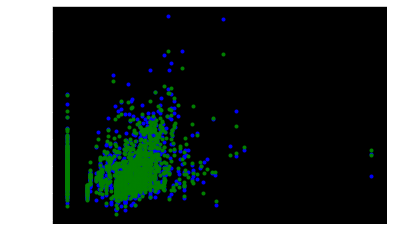

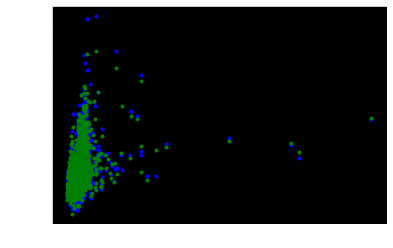

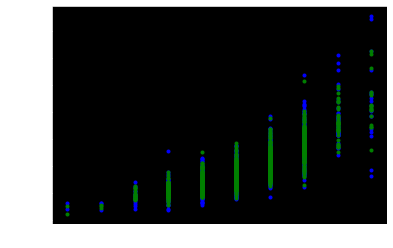

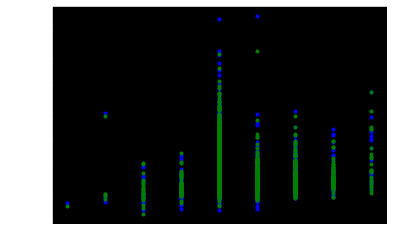

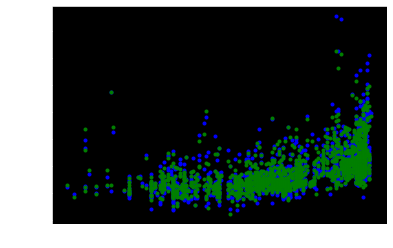

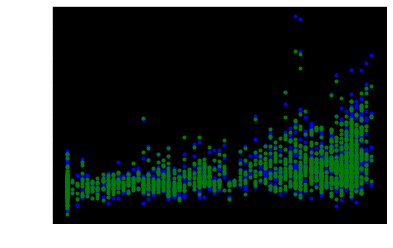

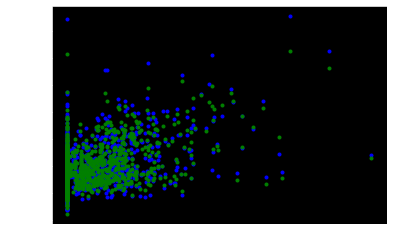

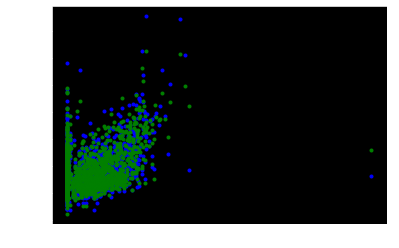

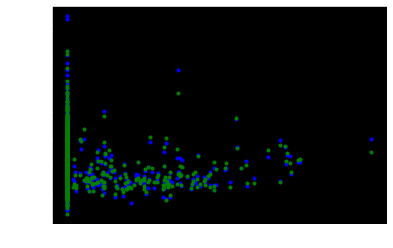

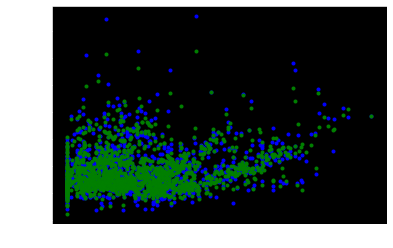

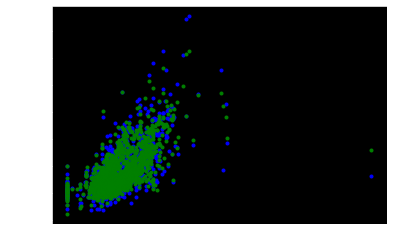

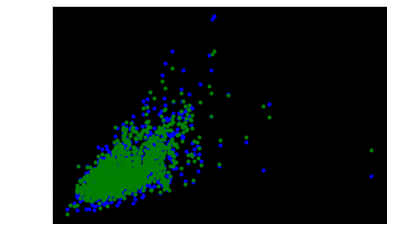

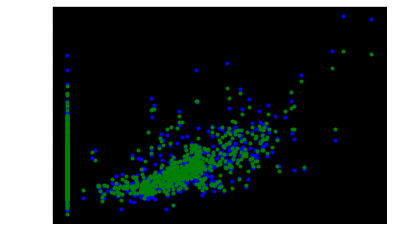

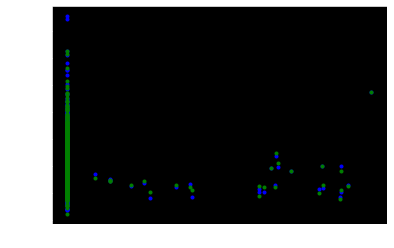

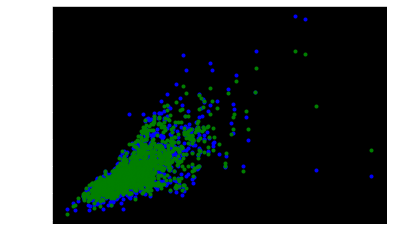

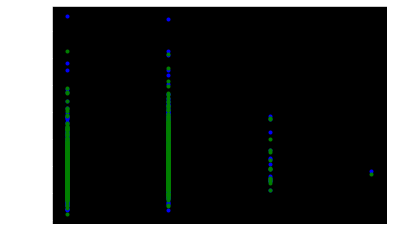

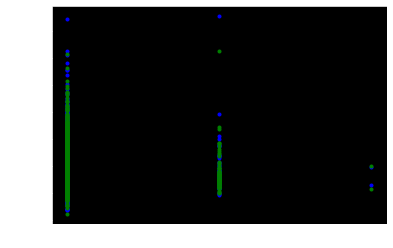

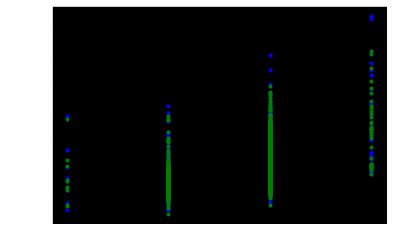

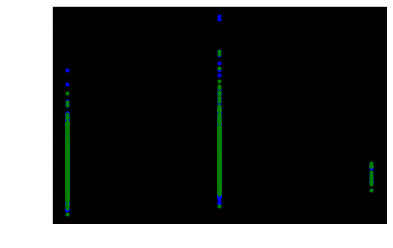

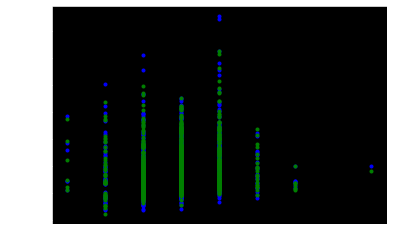

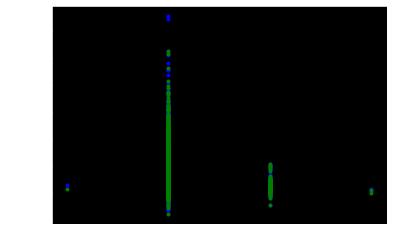

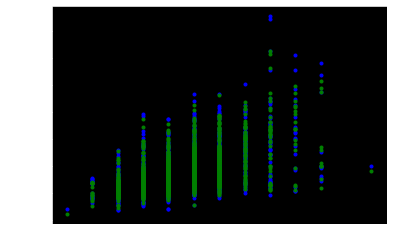

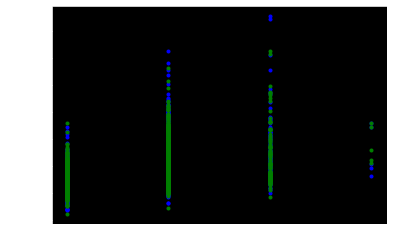

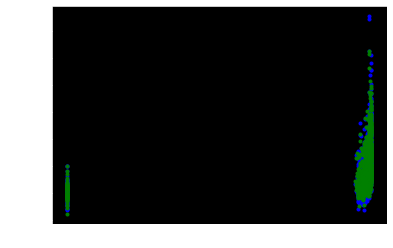

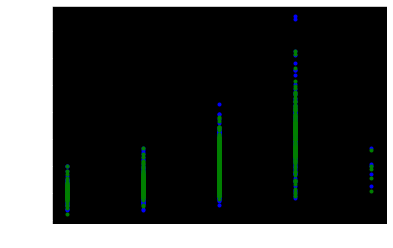

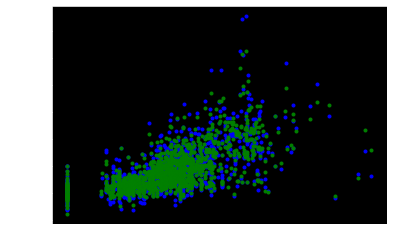

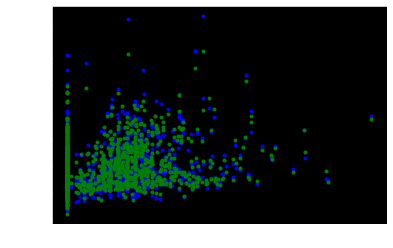

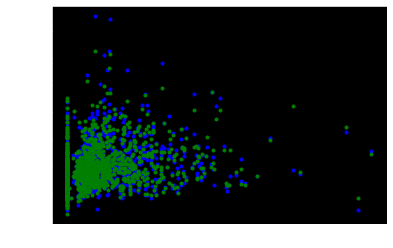

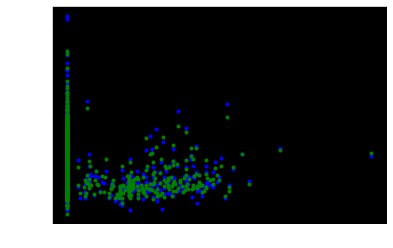

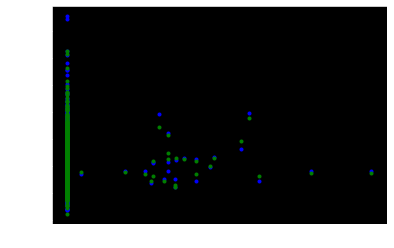

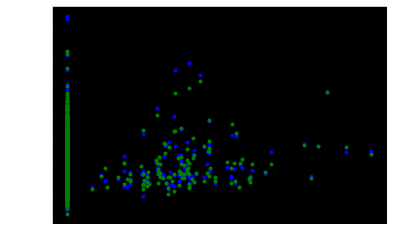

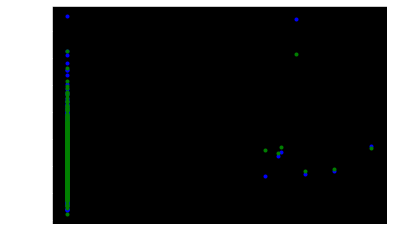

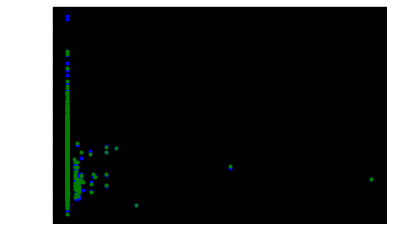

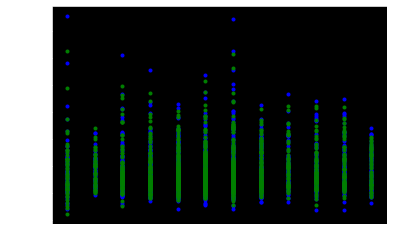

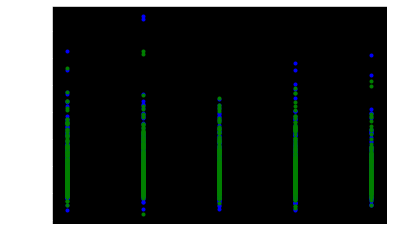

In [1299]:
Y_predict = model.predict(X_train)
Y_predict = yscaler.inverse_transform(Y_predict)

for i in range(features_number):
    plt.subplot(1,1,1)
    plt.plot(X_train[:,i], Y_train, "b.")
    plt.plot(X_train[:,i], Y_predict, "g.")
    plt.show()

In [1312]:
from sklearn import metrics
#print('MSLE : ', metrics.mean_squared_log_error(Y_train, Y_predict))
print('MAE : ', metrics.mean_absolute_error(Y_train, Y_predict)) 
print('MAE : ', metrics.mean_squared_log_error(Y_train, Y_predict)) 

MAE :  14564.530987799657
MAE :  0.014818637379572697


# Résultats

- Sans couche cachées -> MAE = 21 000 \$ **kaggle 0.292**
- 1 hidden avec nbre neurone = nbre input (30) -> MAE = 14 000 \$
- 2 hidden avec nbre neurone = nbre input (30) -> MAE = 14 000 \$ aussi
- 2 hidden avec couches 1 = input + couche 2 = input / 2 -> MAE = 12 000 \$
- 2 hidden avec couches 1 = 2* input + couche 2 = input -> MAE = 12 000 \$ aussi
- 3 hidden avec couches 1 = 2* input + couche 2 = input + couche 3 = input / 2 -> MAE = 12 000 \$ aussi
- 4 hidden : couches 1= 10* input + couche 2=5* input + couche 3=input + couche 4= input/2 -> MAE = 7 000 \$ **kaggle 0.151**
- idem avec optimizer Adam -> MAE = 3 000 \$ / **kaggle 0.164**
- idem avec rate et epoch petit (0.01 / 500) -> MAE = 18 000 \$ **kaggle 0.145**

## Change learning rate

### Learning rate too small

The loss decrease is too slow

![Gradient Descent with a small learning step - Aurélien Géron](figures/GD-small-learning-rate-Geron.png)

(See Figure 4-4 in _Hands-on ML_ book by Aurélien Géron)

### Learning rate too big

Depending on the initialization, it could converge slowly, or it could diverge 

![Gradient Descent with a big learning step - Aurélien Géron](figures/GD-big-learning-rate-Geron.png)

(See Figure 4-5 in _Hands-on ML_ book by Aurélien Géron)

# Génération prédictions sur test et envoi

In [1301]:
X_train.shape

(1460, 35)

In [1302]:
test.shape

(1459, 35)

In [1303]:
test_predict = model.predict(test)
test_predict = yscaler.inverse_transform(test_predict)
test_predict

array([[122536.8 ],
       [142529.38],
       [176112.72],
       ...,
       [183104.72],
       [104735.3 ],
       [240880.73]], dtype=float32)

In [1304]:
test_predict.shape

(1459, 1)

In [1305]:
test_predict = test_predict.reshape(test_predict.shape[0])

In [1306]:
test_predict.shape

(1459,)

## Mise au format final

In [1307]:
submission = pandas.DataFrame({'Id': range(1461, 2920), 'SalePrice': test_predict})
submission

,Id,SalePrice
0,1461,122536.796875
1,1462,142529.375000
2,1463,176112.718750
3,1464,186691.546875
4,1465,170761.578125
...,...,...
1454,2915,97284.937500
1455,2916,102462.351562
1456,2917,183104.718750
1457,2918,104735.296875


In [1308]:
submission_file = "test_predict.csv"
submission.to_csv(submission_file, index=False)

In [1309]:
import kaggle
competition = 'house-prices-advanced-regression-techniques'

In [1310]:
#kaggle.api.competition_submit(submission_file, "03-keras-with-quant-and-epo300", competition)

In [1311]:
kaggle.api.competitions_submissions_list(competition)

[{'ref': 13641192,
  'totalBytes': 21660,
  'date': '2019-12-05T15:14:15.28Z',
  'description': '03-keras-with-quant-and-epo300',
  'errorDescription': None,
  'fileName': 'test_predict.csv',
  'publicScore': '0.15527',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13641192/13641192.raw'},
 {'ref': 13641098,
  'totalBytes': 21692,
  'date': '2019-12-05T15:08:42.23Z',
  'description': '03-keras-with-quant-and-relu',
  'errorDescription': None,
  'fileName': 'test_predict.csv',
  'publicScore': '0.14543',
  'privateScore': None,
  'status': 'complete',
  'submittedBy': 'laurent33',
  'submittedByRef': 'laurent33',
  'teamName': 'laurent33',
  'type': 'standard',
  'url': 'https://www.kaggle.com/submissions/13641098/13641098.raw'},
 {'ref': 13641076,
  'totalBytes': 21644,
  'date': '2019-12-05T15:07:10.213Z',
  'description': '03-k